In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


df = pd.read_csv("rwsi_data.csv")
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


**Checking SessionID where it is unique or not.**

In [3]:
df['SessionID'].is_unique

True

**Dropping Session ID** because all values in this column is unique and name Types, This will not effect our Training Testing etc.

In [4]:
df.drop(columns=['SessionID'], inplace = True)

**Filling NaN values** with Median in **Numerical Columns** order to get **Meaningful Result**

In [5]:
column_name = ['AdClicks','InfoSectionCount','InfoSectionTime','HelpPageVisits','HelpPageTime','ItemBrowseCount','SessionExitRatio','ExitRateFirstPage','ItemBrowseTime','PageEngagementScore','HolidayProximityIndex','TrafficSourceCode']
df[column_name] = df[column_name].fillna(df[column_name].median())


Checking for the  **leftover Nan values**

In [6]:
df.isna().sum()

,0
AdClicks,0
InfoSectionCount,0
InfoSectionTime,0
HelpPageVisits,0
HelpPageTime,0
ItemBrowseCount,0
ItemBrowseTime,0
ExitRateFirstPage,0
SessionExitRatio,0
PageEngagementScore,0


**Filling Nan Values** in **Categorical columns** with **Mode** in order to get **Meaning Result.**

In [7]:
column_nam = ['UserPlatformID','WebClientCode', 'MarketZone','UserCategory']
df[column_nam] = df[column_nam].fillna(df[column_nam].mode().iloc[0])

**Final Checking** for the **Count of Nan Values.**

In [8]:
df.isna().sum()

,0
AdClicks,0
InfoSectionCount,0
InfoSectionTime,0
HelpPageVisits,0
HelpPageTime,0
ItemBrowseCount,0
ItemBrowseTime,0
ExitRateFirstPage,0
SessionExitRatio,0
PageEngagementScore,0


**Label Encoding** has some Order in the columns value for better **Training and Testing.**

In [9]:
cols_encode = ['VisitMonth','UserCategory','IsWeekendVisit','MonetaryConversion']
le = LabelEncoder()

for col in cols_encode:
  df[col] = le.fit_transform(df[col])

**Verifying** Label Encoding has been Done.

In [10]:
df.head(3)

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,2,Windows,Safari,North America,1.0,2,0,0
1,4.0,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,2,Android,Chrome,North America,2.0,2,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,2,MacOS,Safari,Other,3.0,2,0,0


**One Hot Encoding** because there is **No Ordinal Relationship** between Values.

In [11]:
df = pd.get_dummies(df, columns=['UserPlatformID','WebClientCode','MarketZone'], drop_first=True,dtype = int)

In [12]:
df.head(3)

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,...,WebClientCode_Vivaldi,WebClientCode_Yandex Browser,MarketZone_Asia-Pacific,MarketZone_Central America,MarketZone_Europe,MarketZone_Middle East,MarketZone_North America,MarketZone_Oceania,MarketZone_Other,MarketZone_South America
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,...,0,0,0,0,0,0,1,0,0,0
1,4.0,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,...,WebClientCode_Vivaldi,WebClientCode_Yandex Browser,MarketZone_Asia-Pacific,MarketZone_Central America,MarketZone_Europe,MarketZone_Middle East,MarketZone_North America,MarketZone_Oceania,MarketZone_Other,MarketZone_South America
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,1.993917,2.278751,78.690635,0.492539,33.733878,31.169262,1172.754117,0.022043,0.042773,5.709290,...,0.003650,0.000324,0.185888,0.034225,0.087024,0.062530,0.417599,0.058232,0.040065,0.090349
std,1.369830,3.284480,174.978034,1.260653,139.876500,43.576602,1883.061055,0.048345,0.048201,18.304969,...,0.060304,0.018009,0.389032,0.181815,0.281881,0.242126,0.493183,0.234191,0.196119,0.286692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,197.500000,0.000000,0.014286,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,89.729167,0.000000,0.000000,37.000000,1408.937500,0.016667,0.050000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Train Test Split.**

In [14]:
target = 'MonetaryConversion'
x = df.drop(columns=[target])
y = df[target]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
y

,MonetaryConversion
0,0
1,0
2,0
3,0
4,0
...,...
12325,0
12326,0
12327,0
12328,0


Standard Scaling and Robust Scaling

* Standard Scaling have been used for Columns which have little Outliers or no Outliers.
* Robust Scaling is used when there are outliers in the Values.








In [17]:
standard_scaling = ['AdClicks', 'ItemBrowseCount','ItemBrowseCount']
robust_scaling = ['InfoSectionCount','InfoSectionTime','HelpPageTime','ItemBrowseTime', 'PageEngagementScore']

scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

#fits only on training data.
#Learns the pattern/Statistics from your training data.
scaler_standard.fit(x_train[standard_scaling])
scaler_robust.fit(x_train[robust_scaling])

#transforms on both train and testing Data.
#Applies that learned transformation.
x_train[standard_scaling] = scaler_standard.transform(x_train[standard_scaling])
x_test[standard_scaling] = scaler_standard.transform(x_test[standard_scaling])

x_train[robust_scaling] = scaler_robust.transform(x_train[robust_scaling])
x_test[robust_scaling] = scaler_robust.transform(x_test[robust_scaling])

**Verifying** Scaling is done perfectly.

In [18]:
df.head(3)

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,...,WebClientCode_Vivaldi,WebClientCode_Yandex Browser,MarketZone_Asia-Pacific,MarketZone_Central America,MarketZone_Europe,MarketZone_Middle East,MarketZone_North America,MarketZone_Oceania,MarketZone_Other,MarketZone_South America
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,...,0,0,0,0,0,0,1,0,0,0
1,4.0,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,...,0,0,0,0,0,0,0,0,1,0


Performing **Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8682
AUC: 0.8773
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2055
           1       0.72      0.34      0.46       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.69      2466
weighted avg       0.85      0.87      0.85      2466

Confusion Matrix:
[[2002   53]
 [ 272  139]]


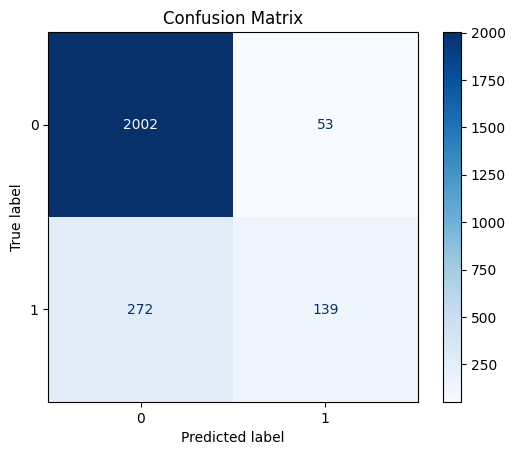

In [19]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)
y_pred_logreg_proba = logreg.predict_proba(x_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_logreg_proba)


accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'AUC: {auc:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred_logreg))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logreg))

cm_linear = confusion_matrix(y_test, y_pred_logreg)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [20]:
2002/(2002+272)

0.8803869832893579

Performing **Decision Tree Classifier**

Accuracy: 0.8459
AUC: 0.7100
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2055
           1       0.54      0.51      0.52       411

    accuracy                           0.85      2466
   macro avg       0.72      0.71      0.72      2466
weighted avg       0.84      0.85      0.84      2466

Confusion Matrix:
[[1878  177]
 [ 203  208]]


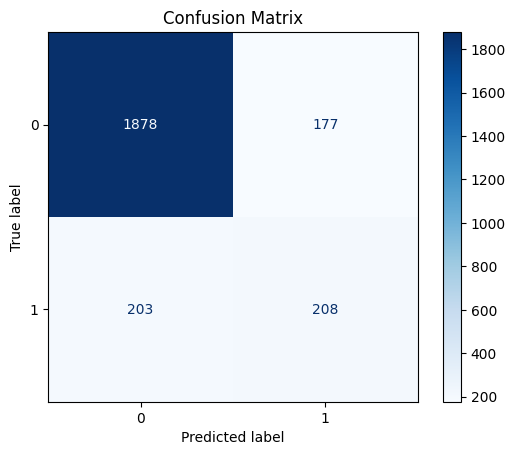

In [29]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

y_pred_dt = dt_classifier.predict(x_test)

y_pred_probab = dt_classifier.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_probab)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'AUC: {auc:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Performing **Gradient Boosting Classifier**

AUC: 0.9192
Accuracy: 0.8909
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix:
[[1973   82]
 [ 187  224]]


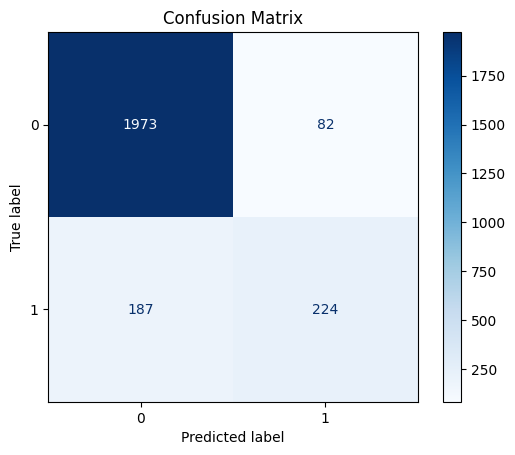

In [31]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train, y_train)

y_pred_gb = gb_classifier.predict(x_test)

y_pred_probabi = gb_classifier.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_probabi)

print(f'AUC: {auc:.4f}')


accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred_gb))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gb))

cm_gb = confusion_matrix(y_test, y_pred_gb)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp3.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Performing **Random Forest Classifier**

AUC: 0.9117
Accuracy: 0.8881
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2055
           1       0.77      0.47      0.58       411

    accuracy                           0.89      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix:
[[1997   58]
 [ 218  193]]


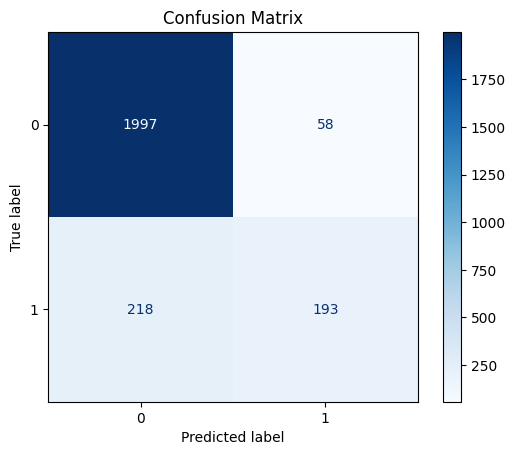

In [32]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)


y_pred_rf = rf_classifier.predict(x_test)

y_pred_probabil = rf_classifier.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_probabil)

print(f'AUC: {auc:.4f}')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp4.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Hyper Parameter Tuning** on **Random Forest classifier**


Test Accuracy: 0.8869

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.76      0.47      0.58       411

    accuracy                           0.89      2466
   macro avg       0.83      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466


Confusion Matrix:
 [[1995   60]
 [ 219  192]]


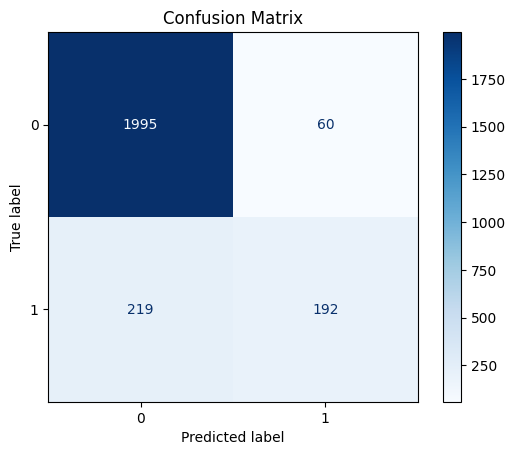

In [24]:
rf_hyper = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_hyper, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred_hyper = best_model.predict(x_test)

test_acc = accuracy_score(y_test, y_pred_hyper)
print(f"\nTest Accuracy: {test_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_hyper))

cm_hyper = confusion_matrix(y_test, y_pred_hyper)
print("\nConfusion Matrix:\n", cm_hyper)


disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_hyper)
disp4.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()